In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_rcv1
from sklearn import datasets
from scipy.spatial import distance

In [89]:
def unique(list): 
    '''
    Creates list with unique values from list
    '''
    # intilize a null list 
    unique_list = []
    # traverse for all elements 
    for x in list: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 

    return unique_list
      

In [90]:
#iris
from sklearn.model_selection import train_test_split
data_all, data_label = datasets.load_iris(return_X_y=True) #datasets.load_breast_cancer(return_X_y=True) #datasets.load_iris(return_X_y=True)
data_all_train, data_all_test, data_label_train, data_label_test = train_test_split(data_all, data_label, test_size=0.3)

number_of_classes = len(unique(data_label))
print(number_of_classes)

3


In [91]:
#testing loading data and encode columns with cathegorial values 
pdd = pd.read_csv("D:\Studia\inz\glass\Titanic.csv", sep = ",") #winequality-red.csv", sep = ";") 
#("D:\Studia\inz\datasets\iris\iris_data.csv")
from sklearn import preprocessing as prp

#column with labels, index or column name
label_col = 'Survived'#"quality"#4

pdd = pdd.drop(columns = 'Name')
# encoder = prp.LabelEncoder()
# n_features = pdd.shape[1]

# for i in range(n_features):
#     print(pdd.dtypes[i])
#     if(pdd.dtypes[i] == 'object'):
#         print('obj')
#         encoder.fit(pdd.iloc[:, [i]])
#         print(encoder.classes_)
        
#         #pdd.replace(pdd.iloc[:, [i]], encoder.transform(encoder.classes_) )
#         # apply le on categorical feature columns
#         #pdd[i] = pdd[i].apply(lambda col: encoder.fit_transform(pdd.iloc[:, [i]]))

# categorical type filter
categorical_features = pdd.dtypes==object
# filter categorical column
categorical_cols = pdd.columns[categorical_features].tolist()
encoder = prp.LabelEncoder()
# apply encoder on categorical feature columns
try:
    pdd[categorical_cols] = pdd[categorical_cols].apply(lambda col: encoder.fit_transform(col))
except ValueError:
    print("Nothing to encode")
except TypeError: 
    print("TypeError: '<' not supported between instances of 'str' and 'float' During handling of the above exception, another exception occurred:")
########################
if type(label_col)==str: #column name
    #create data frame with class labels
    pdd_label = pdd[label_col]
    #drop column with label 
    pdd_data = pdd.drop(columns=label_col)
else: #column index
    #create data frame with class labels
    pdd_label = pdd.iloc[:, [label_col]]
    #drop column with label 
    pdd_data = pdd.drop(pdd.columns[label_col], axis = 1)


TypeError: '<' not supported between instances of 'str' and 'float' During handling of the above exception, another exception occurred:


In [92]:
pdd_data

,PClass,Age,Sex
0,1st,29.00,female
1,1st,2.00,female
2,1st,30.00,male
3,1st,25.00,female
4,1st,0.92,male
...,...,...,...
1308,3rd,27.00,male
1309,3rd,26.00,male
1310,3rd,22.00,male
1311,3rd,24.00,male


In [93]:
pdd_label

0       1
1       0
2       0
3       0
4       1
       ..
1308    0
1309    0
1310    0
1311    0
1312    0
Name: Survived, Length: 1313, dtype: int64

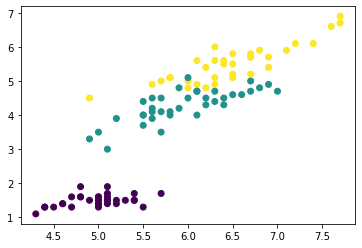

In [94]:
plt.scatter(data_all_train[:,0], data_all_train[:,2],c=data_label_train)

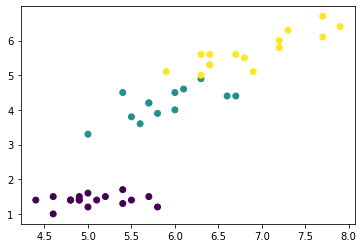

In [95]:
plt.scatter(data_all_test[:,0], data_all_test[:,2],c=data_label_test)

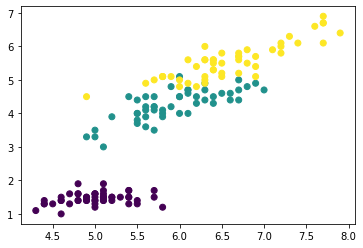

In [96]:
plt.scatter(data_all[:,0], data_all[:,2],c=data_label)

In [97]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN #zerodivision
from sklearn.cluster import OPTICS #zerodivision - -1 one cluster
from sklearn.cluster import KMeans
# grouping_types_with_ncl = { kmeans: KMeans(n_clusters=number_of_clusters),
#                         spectral: SpectralClustering(n_clusters=number_of_clusters),
#                         agglomerative: Agglomerative(n_clusters=number_of_clusters)}

In [98]:
def create_clusters(data, number_of_clusters = 20):
    '''
    Function creating n_clusters from data
    Return array of labels of created clusters.
    '''

    #creating clusters using k-means algorithm
    clust = KMeans(n_clusters=number_of_clusters)#KMeans(n_clusters=number_of_clusters)
    clust.fit(data)
    
    return clust.labels_

In [99]:
def group_id_by_cluster(clusters):
    '''
    Function grouping indexes of data by indexes of clusters
    Return dictionary
    '''
    #creating list grouping idexes of training data grouped by cluster label
    clusters_with_id = defaultdict(list)
    for idx, cluster in enumerate(clusters):
        clusters_with_id[cluster].append(idx)

    return clusters_with_id

In [100]:
from collections import defaultdict

#create clusters
number_of_clusters = 20* number_of_classes
clusters = create_clusters(data = data_all_train, number_of_clusters = number_of_clusters) 
clusters_with_id = group_id_by_cluster(clusters = clusters)


In [101]:
# def median_in_cluster(data_all, indexes):
#     count_of_values = len(indexes)
#     sum = 0

#     # liczba wszystkich wymiarów wzgledem których ma być sumowane
#     count_of_features = data_all[0].shape[0]

#     median = np.array([])
    
#     for feature in range(count_of_features):
#         for index in indexes:
#             actual_data = data_all[index]
#             sum += actual_data[feature]
#         median = np.append(median, sum/count_of_values)
#         sum = 0

#     return median

In [102]:
"""
Function finding index of point in data, nearest to given point. Using for find nerest point of mean in homogeniuos cluster 
TODO czy ma zwracać kilka indesów jeżeli takie same odległosci?
"""
def find_id_of_nearest_point(data_all, indexes, point):
    #id of nearest, for now the first
    id = indexes[0] 
    #minimal distance, for now - the first distance
    min_dist = distance.euclidean(point, data_all[id])

    for i in indexes:
        data = data_all[i]
        dist = distance.euclidean(point, data)
        if min_dist > dist:
            min_dist = dist
            id = i

    return id

In [103]:
"""
Function return index of nearest instance to given
element - index of instance 
indexes_of_data - indexes of instances from which have to find nearest to element
data_all - array of all instances to get data of selected index
"""
def find_nearest_instance(element, indexes_of_data, data_all):
    point = data_all[element]
    #first temporary index
    id = 0
    #minimal distance, for now - the first distance
    min_dist = distance.euclidean(point, data_all[id])
    for i in indexes_of_data:
        if i == element:
            break
        data = data_all[i]
        dist = distance.euclidean(point, data)
        if min_dist > dist:
            min_dist = dist
            id = i

    return id

In [104]:
# '''
# data_all - data from getting exact
# indexes - indexes of data from data_all
# '''
# def data_for_indexes(data_all, indexes):
#     data_indexes = np.array([])
#     for id in indexes:
#         data_indexes = np.append(data_indexes, data_all[id])

#     return data_indexes

In [105]:
"""
Function return index of majority class
"""
def find_majority_class(number_of_classes, classes_with_indexes):
    max = len(classes_with_indexes[0])
    majority_class = 0

    for i in range(number_of_classes):
        count = len(classes_with_indexes[i])
        if max < count:
            max = count
            majority_class = i

    return majority_class


In [106]:
'''
Function calculating mean point in cluster.
data_all - training dataset
indexes - array of indexes of cluster form training dataset

TODO: ZeroDivisionException
'''
def mean_point_in_cluster(data_all, indexes):
    count_of_values = len(indexes)
    sum = 0

    #dimesionality of point
    count_of_features = data_all[0].shape[0]
    mean_point = np.array([])
    
    for feature in range(count_of_features):
        sum = 0
        for index in indexes:
            actual_data = data_all[index]
            sum += actual_data[feature]
        mean_point = np.append(mean_point, sum/count_of_values)

    return mean_point


In [107]:
def group_cluster_by_class(cluster):
    '''
    Function creates array with indexes in cluster grouped by class label
    '''
    #initialize array with 0 occurrence of each class
    classes_with_indexes = []

    #initialize array
    for i in range(number_of_classes):
        classes_with_indexes.append([])

    for instance_id in cluster:
    #checking label of instance
        class_label_of_instance = data_label_train[instance_id]
        #add to array for class label
        classes_with_indexes[class_label_of_instance].append(instance_id)

    return classes_with_indexes
    


In [108]:
def check_homogenious(cluster):
    '''
    Function checking if the cluster is homogenious or not
    Return True if is, False if not.
    '''
    grouped_cluster = group_cluster_by_class(cluster)
    
    is_homogeniuos = True
    count_of_classes_in_cluster = 0
    for i in range(number_of_classes):
        if(len(grouped_cluster[i]) > 0):
            count_of_classes_in_cluster+=1
    if (count_of_classes_in_cluster > 1):
        is_homogeniuos = False
    
    return is_homogeniuos


In [109]:
def prepare_reduced_set(reduced_set):
    '''
    Function prepare reduced dataset grouped by label for using in classificators
    reduced_set - dataset grouped by label

    Return:
    np_red_data - uninterrupted array of instances
    np_red_label - array of labels

    TODO: remove repeated values?
    '''
    
    reduced_labels = []
    tmp = []
    for i in range(number_of_classes):
        for id in reduced_set[i]:
            reduced_labels.append(i)
            tmp.append(id.tolist())

    #reduce repeated values
    #new array 
    # print(len(tmp))
    # tmp2 = []
    # indexes=[]

    # #find indexes repeated values
    # for i in range(len(tmp)):
    #     if tmp[i] not in tmp2:
    #         indexes.append(i)
    #         tmp2.append(tmp[i])
    # dat=[]
    # lab = []
    # for i in indexes:
    #     dat.append(tmp[i])
    #     lab.append(reduced_labels[i])

    # print(len(dat))

    np_red_data = np.array(tmp)
    np_red_label = np.array(reduced_labels)
    return np_red_data, np_red_label


In [110]:
def clustering_reduction(clusters_with_id, data_all_train):
    """
    The main function of clustering reduction module
    
    :param clusters_with_id: - indexes of instances from training dataset grouped by indexes of clusters
    :param data_all_train: - training dataset

    :returns: np_red_data - reduced dataset received as a result
    np_red_col - labels of reduced dataset

    """
    classes_with_indexes = []
    #create empty reduced dataset
    reduced_set = []

    #init arrays dimensionality 
    for i in range(number_of_classes):
        classes_with_indexes.append([])
        reduced_set.append([])

    #for each cluster
    for i in range(number_of_clusters):
        #for each instance in cluster
        for instance_id in clusters_with_id[i]:
            class_label_of_instance = data_label_train[instance_id]
            classes_with_indexes[class_label_of_instance].append(instance_id)

        #checking if the cluster is homogenious
        is_homogeniuos = check_homogenious(clusters_with_id[i])


        if (is_homogeniuos):
            #find index of majority class - in this case only one possible
            cm = find_majority_class(number_of_classes, classes_with_indexes)
            #find mean point in cluster 
            mean_point = mean_point_in_cluster(data_all=data_all_train, indexes=clusters_with_id[i])
            #print(mean_point)
            #find index of intance located in cluster nearest to mean point
            accept_id = find_id_of_nearest_point(data_all = data_all_train, indexes = clusters_with_id[i], point = mean_point)
            #print(accept_id)

            #add instance within the class 9to reduced set 
            reduced_set[cm].append(data_all_train[accept_id])
            
        else:
            #majority class in cluster
            cm = find_majority_class(number_of_classes, classes_with_indexes)
            #print(cm)

            #for each instance in other classes find nearest instance to checked from majority class and belonging class
            #add instances to reduced set
            for class_id in range(number_of_classes):
                if class_id == cm:
                    break
                for el in classes_with_indexes[class_id]:
                    #nearest form majority class
                    nearest_of_majority_class = find_nearest_instance(element = el, indexes_of_data = classes_with_indexes[cm], data_all = data_all_train)
                    reduced_set[cm].append(data_all_train[nearest_of_majority_class])
                    #nearest from belonging class
                    nearest_of_actual_class = find_nearest_instance(element = el, indexes_of_data = classes_with_indexes[class_id], data_all = data_all_train)
                    #reduced_set = np.append(reduced_set, data_all_train[nearest_of_actual_class])
                    reduced_set[cm].append(data_all_train[nearest_of_actual_class])
            
        #reset array    
        classes_with_indexes = []
        for j in range(number_of_classes):
            classes_with_indexes.append([])


    np_red_data, np_red_col = prepare_reduced_set(reduced_set)
    return np_red_data, np_red_col

In [111]:
np_red_data, np_red_col = clustering_reduction(clusters_with_id, data_all_train)

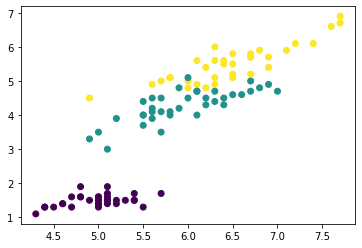

In [112]:
plt.scatter(data_all_train[:,0], data_all_train[:,2],c=data_label_train)

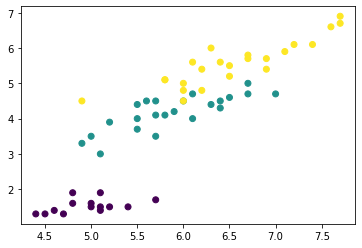

In [113]:
plt.scatter(np_red_data[:,0], np_red_data[:,2],c=np_red_col)

In [114]:
def print_raport(time, accuracy, n_instances):
    """
    Function prints raport
    :param time: elapsed time
    :param accuracy: accuracy of classifier
    :param n_instances: number of instances in fited dataset
    """
    print("Time:  ", time)
    print('Accuracy:  ', accuracy)
    print('Count of instances', n_instances)
    print('=============')

In [115]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


classifiers = {'knn': KNeighborsClassifier(), 
                'svm': svm.SVC(), 
                'naive_bayers': GaussianNB(), 
                'decision_tree': DecisionTreeClassifier(),
                'neutral_network': MLPClassifier()}


def raport_classify(original_set, original_labels, reduced_set, reduced_labels, test_set, test_labels, classifier_type = 'all'):
    '''
    Function creates raport for passed classifier_type. 
    classifier_type - optional, if not passed raport is creating for all classifiers 
    original_set - original dataset
    original_labels - array of labels for original dataset
    reduced_set - dataset gained after using reduction algorithm 
    reduced_labels - array of labels for reduced_set
    '''
    if classifier_type == 'all':
        for c_type in classifiers:
            t = time.process_time()
            classifier = classifiers[c_type]
            classifier.fit(original_set, original_labels)
            accuracy = classifier.score(test_set, test_labels)
            elapsed = time.process_time() - t
            print('=============')
            print("Classifier:  ", c_type)
            print('=============')
            print("Raport for original dataset:")
            print_raport(elapsed, accuracy, len(original_labels))

            t = time.process_time()
            classifier = classifiers[c_type]
            classifier.fit(reduced_set, reduced_labels)
            accuracy = classifier.score(test_set, test_labels)
            elapsed = time.process_time() - t
            print("Raport for reduced dataset:")
            print_raport(elapsed, accuracy, len(reduced_labels))
    else:
        t = time.process_time()
        classifier = classifiers[classifier_type]
        classifier.fit(original_set, original_labels)
        accuracy = classifier.score(test_set, test_labels)
        elapsed = time.process_time() - t
        print('=============')
        print("Classifier:  ", classifier_type)
        print('=============')
        print("Raport for original dataset:")
        print_raport(elapsed, accuracy, len(original_labels))

        t = time.process_time()
        classifier = classifiers[classifier_type]
        classifier.fit(reduced_set, reduced_labels)
        accuracy = classifier.score(test_set, test_labels)
        elapsed = time.process_time() - t
        print("Raport for reduced dataset:")
        print_raport(elapsed, accuracy, len(reduced_labels))

raport_classify(data_all_train, data_label_train, np_red_data, np_red_col, data_all_test, data_label_test)

Classifier:   knn
Raport for original dataset:
Time:   0.0
Accuracy:   0.9777777777777777
Count of instances 105
Raport for reduced dataset:
Time:   0.0
Accuracy:   1.0
Count of instances 60
Classifier:   svm
Raport for original dataset:
Time:   0.0
Accuracy:   1.0
Count of instances 105
Raport for reduced dataset:
Time:   0.0
Accuracy:   1.0
Count of instances 60
Classifier:   naive_bayers
Raport for original dataset:
Time:   0.0
Accuracy:   1.0
Count of instances 105
Raport for reduced dataset:
Time:   0.0
Accuracy:   1.0
Count of instances 60
Classifier:   decision_tree
Raport for original dataset:
Time:   0.0
Accuracy:   0.9777777777777777
Count of instances 105
Raport for reduced dataset:
Time:   0.0
Accuracy:   0.9777777777777777
Count of instances 60
Classifier:   neutral_network
Raport for original dataset:
Time:   0.171875
Accuracy:   1.0
Count of instances 105
Raport for reduced dataset:
Time:   0.109375
Accuracy:   0.9555555555555556
Count of instances 60


In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix


classify_metrics = {"accuracy": accuracy_score,
                    "f1": f1_score,
                    "precision": precision_score,
                    "recall": recall_score}

                    ###################test
classifier = classifiers['knn']
classifier.fit(data_all_train, data_label_train)
pred = classifier.predict(data_all_test)
# data_all_train, data_label_train, np_red_data, np_red_col, data_all_test, data_label_test
for metric in classify_metrics:
    if (metric == 'accuracy'):
        print(metric, ": ", classify_metrics[metric](data_label_test, pred))
    else: 
        print(metric, ": ", classify_metrics[metric](data_label_test, pred, average=None))

accuracy :  0.9777777777777777
f1 :  [1.         0.96       0.96774194]
precision :  [1.     1.     0.9375]
recall :  [1.         0.92307692 1.        ]


Classifier:   knn
Raport for original dataset
Count of instances:  105
accuracy :  0.9777777777777777
f1 :  [1.         0.96       0.96774194]
precision :  [1.     1.     0.9375]
recall :  [1.         0.92307692 1.        ]
===
Training time:  0.0007331000015255995
Predicting time:  0.004452899998796056

Raport for reduced dataset
Count of instances:  60
accuracy :  0.9777777777777777
f1 :  [1.         0.96       0.96774194]
precision :  [1.     1.     0.9375]
recall :  [1.         0.92307692 1.        ]
===
Training time:  0.00047140000060608145
Predicting time:  0.002078100000289851 

Classifier:   svm
Raport for original dataset
Count of instances:  105
accuracy :  0.9777777777777777
f1 :  [1.         0.96       0.96774194]
precision :  [1.     1.     0.9375]
recall :  [1.         0.92307692 1.        ]
===
Training time:  0.0019513999995979248
Predicting time:  0.0004967999993823469

Raport for reduced dataset
Count of instances:  60
accuracy :  0.9777777777777777
f1 :  [1.        

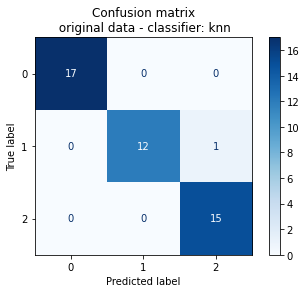

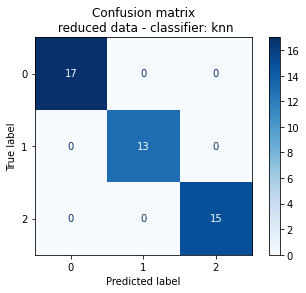

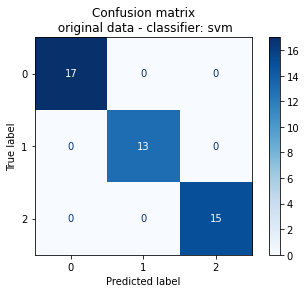

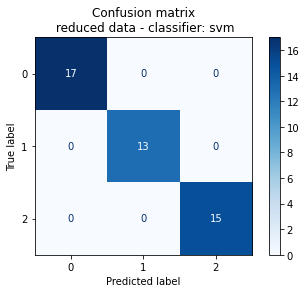

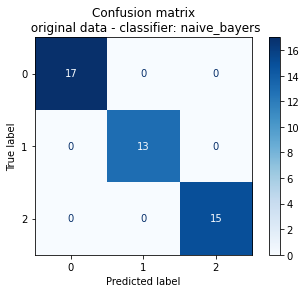

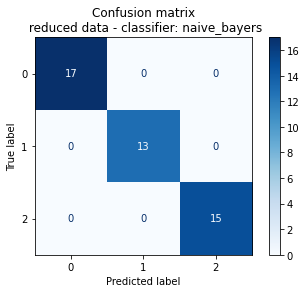

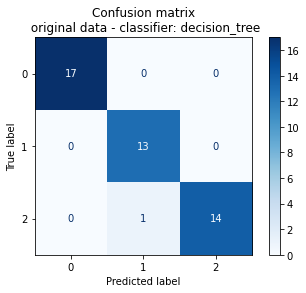

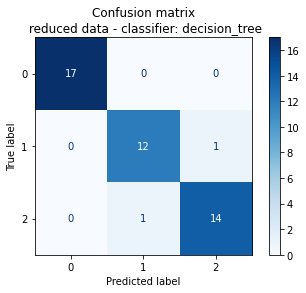

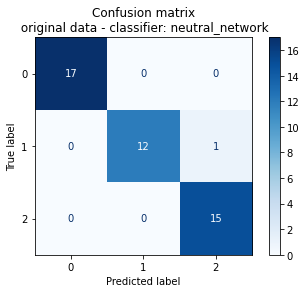

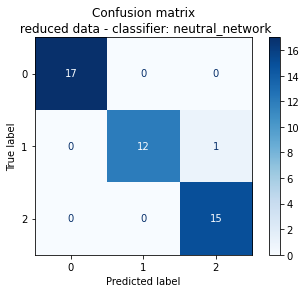

In [117]:
import time

def raport_classify2(original_set, original_labels, reduced_set, reduced_labels, test_set, test_labels, classifier_type = 'all'):
    if classifier_type == 'all':
        for c_type in classifiers:
            #select classifier
            classifier = classifiers[c_type]
            #train with original dataset and time measure
            start = time.clock()
            classifier.fit(original_set, original_labels)
            end = time.clock()
            training_time = end - start

            #make predictions and time measure
            start = time.clock()
            predict = classifier.predict(test_set)
            end = time.clock()
            prediction_time = end - start

            #create confusion matrix
            plot = plot_confusion_matrix(classifier, data_all_test, data_label_test, cmap=plt.cm.Blues)
            title = "Confusion matrix\n original data - classifier: " + str(c_type)
            plot.ax_.set_title(title)

            #print raport with metrics for original training data
            print('=============')
            print("Classifier:  ", c_type)
            print('=============')
            print("Raport for original dataset")
            print('Count of instances: ', len(original_labels))
            for metric in classify_metrics:
                if (metric == 'accuracy'):
                    print(metric, ": ", classify_metrics[metric](test_labels, pred))
                else: 
                    print(metric, ": ", classify_metrics[metric](test_labels, pred, average=None))
            print('===')
            print("Training time: ", training_time)
            print("Predicting time: ", prediction_time)


            #same for reduced training dataset
            classifier = classifiers[c_type]
            start = time.clock()
            classifier.fit(reduced_set, reduced_labels)
            end = time.clock()
            training_time = end - start
            start = time.clock()
            predict = classifier.predict(test_set)
            end = time.clock()
            prediction_time = end - start

            plot = plot_confusion_matrix(classifier, data_all_test, data_label_test, cmap=plt.cm.Blues)
            title = "Confusion matrix\n reduced data - classifier: " + str(c_type)
            plot.ax_.set_title(title)  
            print("\nRaport for reduced dataset")
            print('Count of instances: ', len(reduced_labels))
            for metric in classify_metrics:
                if (metric == 'accuracy'):
                    print(metric, ": ", classify_metrics[metric](test_labels, pred))
                else: 
                    print(metric, ": ", classify_metrics[metric](test_labels, pred, average=None))
            
            print('===')
            print("Training time: ", training_time)
            print("Predicting time: ", prediction_time, "\n")

raport_classify2(data_all_train, data_label_train, np_red_data, np_red_col, data_all_test, data_label_test)